<a href="https://colab.research.google.com/github/JuaFeQuimbay/Curso-Mineria-de-Datos/blob/main/Tarea_2_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#REGRESION LINEAL

La [regresión lineal](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal) es un método estadístico el cual busca modelar de la mejor manera la relación que existe entre una
variable dependiente, tambien llamada variable respuesta usualmente se denotada por $Y$ y un conjunto finito de variables independedientes o variables explicativas $X$. 

Estos modelos se encuentran atados a algunos supuestos dependiendo de la formulación que tenga este. Algunos modelos pueden estar dados de la siguiente manera:

$$Y_i= \beta_0 + \beta_1X_{i1} + \beta_2X_{i2}+\dots+\beta_kX_{ik}+\epsilon_i$$

Cuando solo hay una variable explicativa es decir cuando $k=1$ se le llama al modelo un **Modelo de Regresión Lineal Simple**. Mientras que en el caso en el cual hay presente más de una variable que explique el comportamiento o la variación de la variable respuesta, es llamado un **Modelo de Regresión Multiple**  

La regresión lineal es una herramienta estadística de uso frecuente pues sus modelos no son muy dificiles de ajustar y además permite hacer predicciones de la variable respuesta. Es por esta razon que la mayoria de los lenguajes de programación como $R$ o $Python$  contienen paquetes que facilitan su uso. 



##Historia
La primera descripción documentada sobre un
método de regresión lineal fue publicada por Legendré en 1805. En esta publicación aborda el método de [mínimos cuadrados](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados). Despues de algunas decadas Sir Francis Galton, médico y primo de
Charles Darwin, fue quien introdujo el término regresión,
en su artículo 'Regression towards mediocrity in hereditary stature”publicado en 1886 en el Journal of the
Anthropological Institute. En ese trabajo, Galton centró su descripción en la  altura de los descendientes la cual jugo un papel como variable respuesta a partir
de la altura de sus padres (variable independiente).
Analizó la altura de 205 padres y 930 hijos adultos a
partir de sus registros familiares y llegó a la conclusión
de que aquellos padres muy altos tenían una tendencia a tener
hijos que heredaban parte de esta altura, pero
revelaba además una tendencia a regresar a la estatura
media, así mismo aquellos padres que presentaban una estatura baja tenia hijos con una estatura baja, pero con un ligero incremento en la variable.

# Ejemplo Regresión Lineal Multiple



Mediante la base de datos obtenida en [Kaggle](https://www.kaggle.com/himanshuntt/indian-housing-price) se procede a hacer un modelo de regresion lineal multiple, en el cual se trata de explicar la variabilidad del precio de una casa en la India mediante distintas variables como el area del lote, el número de baños, el area de la vivienda entre algunas otras. 







In [ ]:
from IPython.display import Image
Image(width=500,url='https://previews.123rf.com/images/kod22/kod221307/kod22130700069/21376106-casas-coloridas-en-peque%C3%B1a-india-singapur.jpg')

Como primer acercamiento nos encontrariamos con un modelo de la siguiente manera:
$$Y_i=\beta_0+\beta_1X_1+\beta_2X_2+\beta_3X_3+\beta_4X_4+\beta_5X_5+\epsilon_i$$

Donde:

*   $Y_i:$ El precio de la vivienda
*   $X_1:$ Area de la vivienda
*   $X_2:$ Número de baños en la vivienda
*   $X_3:$ Tamaño del lote
*   $X_4:$ Tiempo de contruida la vivienda

Y se encuentra sujeto a los siguientes supuestos:

*   $E(\epsilon_i)= 0 $ 
*   $Var(\epsilon_i)=\sigma^2$ 
*   $Cov(\epsilon_i,\epsilon_j)=0$ 
*   $\epsilon_i \sim Normal(0,\sigma^2I)$ 
*   $X_i$ es independiente de $X_j$ para todo $i \not= j$

Mediante el mismo metodo abordado por Legendré se encontraran los respectivos parámetros de la regresión, es decir, mediante el metodo de Minimos Cuadrados se hallarán los valores de $\beta_i$ para $i=0,1,...,5$. Este metodo consiste en un principio en minimizar la suma de los cuadrados del error
\begin{align}
  l= \sum e_i^2=e^te=&(Y-X\beta)^t(Y-X\beta)\\
  =&Y^tY-\beta^tX^tY-Y^tX\beta+\beta X^tX\beta
\end{align}
Luego derivando con respecto a $\beta$ e igualando a cero obtenemos:
\begin{align}
  \frac{dl}{d\beta}=&-2X^tY+2X^tX\beta=0\\
  &=-X^tY+X^tX\beta=0
\end{align}
Por lo tanto un estimador insesgado para $\beta$ será:
 $$\hat{\beta}=X^tY(X^tX)^{-1}$$



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df1=pd.read_csv('/content/houseprice.csv')
X = df1.drop(["Fireplace","Bedrooms","Price"],axis=1)
Y = df1.iloc[:, -1]

In [ ]:
df1.describe()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,1.807303,1.918338,3.183381,0.569580,28.061127,0.593123,16.386213
std,0.641461,0.641735,0.750265,0.777879,34.900899,0.491486,6.765156
min,0.672000,1.000000,1.000000,0.000000,0.000000,0.000000,1.685800
25%,1.336000,1.500000,3.000000,0.210000,6.000000,0.000000,11.201400
50%,1.672000,2.000000,3.000000,0.390000,18.000000,1.000000,15.191700
75%,2.206000,2.500000,4.000000,0.600000,34.000000,1.000000,20.523500
max,4.534000,4.500000,6.000000,9.000000,247.000000,1.000000,44.643600


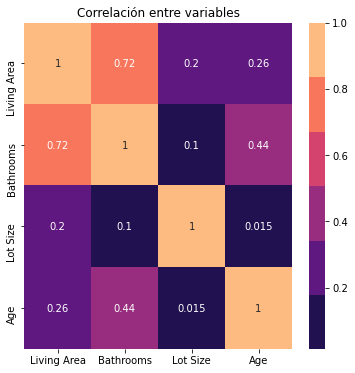

In [ ]:
#GRAFICO DE CORRELACION ENTRE VARIABLES
corr = np.abs(X.corr())
fig, ax = plt.subplots(figsize=(6, 6))
cmap = sns.color_palette("magma")
sns.heatmap(corr, cmap=cmap, annot=True) #annot=True: Permite ver la correlación númerica entre cada variable en el grafico
plt.title('Correlación entre variables')
plt.show()

Parece no haber problemas de multicolinealidad entre las variables explicativas pues no hay valores demasiado alarmantes 

In [ ]:
#Creación de los sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state = 0)

In [ ]:
#Entrenamiento del Modelo deRegresion
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Coeficientes de la Regresión
y_predict=regressor.predict(x_test)
print(regressor.intercept_)
print(regressor.coef_)

1.697999747002985
[ 6.42601578  1.85819119  0.1168184  -0.02388812]


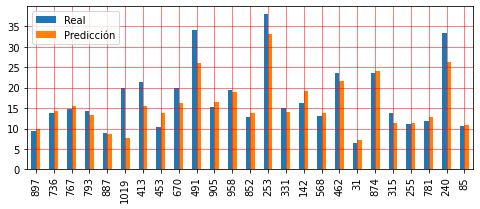

In [ ]:
#Actual vs prediction plotting
#Predicción
df = pd.DataFrame({'Real': y_test, 'Predicción': y_predict.flatten()})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(8,3))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
# calculamos el coeficiente de determinación R2
r2 = regressor.score(X, Y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.6404105361133134


Finalmente el modelo de regresión ajustado está dado de la siguiente manera:

$$\hat{Precio_i}=1.7+6.42AreaVivienda+1.85NumeroBaños+0.11AreaVivienda-0,02TiempoConstruida$$

#Conclusiones


1.   El modelo explica cerca del 64% de la variablidad del precio de las casas de la muestra en la India
2.   El modelo logra hacer algunas predicciones bastante cercanas al valor real  que tienen las viviendas
3. Es posible que se deba incluir alguna otra variable que aumente la variabilidad explicada por el modelo.



#Bibliografia:


*   EDA & Prediction Of Indian House Price. (2021). Retrieved 5 March 2021, from https://www.kaggle.com/amruthasagarl/eda-predictionofindianhouseprice

*   Melo Martínez, O., & López Pérez, L. (2020). MODELOS LINEALES NOTAS DE CLASE. Bogotá.


*   Retrieved 5 March 2021, from https://www.researchgate.net/profile/Rodolfo-Rivas-Ruiz/publication/259107656_From_clinical_judgment_to_linear_regression_model/links/02e7e52a543fcacfd6000000/From-clinical-judgment-to-linear-regression-model.pdf

* Regresión lineal. (2021). Retrieved 5 March 2021, from https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal



